In [1]:
#Cela importe la bibliothèque NumPy et lui donne l'alias np, qui est communément utilisé comme raccourci pour la 
#bibliothèque dans le code Python. Une fois que NumPy est importé, vous pouvez utiliser ses fonctions et classes 
#dans votre code.
import numpy as np

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor

                

In [2]:
#Cette instruction permet de lire un fichier CSV nommé "dataset1.csv" à partir de l'emplacement "E:\" 
#(c'est-à-dire le lecteur E: du système de fichiers) et de stocker son contenu dans une variable appelée 
#dataset en utilisant la bibliothèque Pandas.

#La fonction read_csv de Pandas est utilisée pour lire des fichiers CSV et renvoyer un objet DataFrame,
#qui est une structure de données tabulaire bidimensionnelle avec des étiquettes d'axe pour les colonnes 
#et les lignes. Une fois le fichier CSV lu et stocké dans un objet DataFrame, vous pouvez utiliser les 
#fonctionnalités de Pandas pour manipuler et analyser les données.
dataset = pd.read_csv("E:\dataset1.csv")
print(dataset.shape)



(140255, 7)


In [3]:
Columns = ['Time', 'PV', 'Global irradiance(W/m2)', 'Sun height (degree)', 'Temperature (degree Celsius)', 'Wind Speed (m/s)', 'Solar radiation']
dataset.columns=Columns
dataset

,Time,PV,Global irradiance(W/m2),Sun height (degree),Temperature (degree Celsius),Wind Speed (m/s),Solar radiation
0,20050101:0109,0.0,0.0,0.0,9.64,3.72,0.0
1,20050101:0209,0.0,0.0,0.0,9.40,3.66,0.0
2,20050101:0309,0.0,0.0,0.0,9.29,3.59,0.0
3,20050101:0409,0.0,0.0,0.0,9.04,3.45,0.0
4,20050101:0509,0.0,0.0,0.0,8.89,3.38,0.0
...,...,...,...,...,...,...,...
140250,20201231:1909,0.0,0.0,0.0,10.48,0.97,0.0
140251,20201231:2009,0.0,0.0,0.0,9.80,1.03,0.0
140252,20201231:2109,0.0,0.0,0.0,7.96,1.38,0.0
140253,20201231:2209,0.0,0.0,0.0,7.61,2.07,0.0


In [4]:
dataset.describe()

,PV,Global irradiance(W/m2),Sun height (degree),Temperature (degree Celsius),Wind Speed (m/s),Solar radiation
count,140255.000000,140255.000000,140255.000000,140255.000000,140255.000000,140255.0
mean,182.137988,237.086497,16.172380,18.697052,3.127904,0.0
std,258.307529,333.816681,21.402834,6.518796,1.640102,0.0
min,0.000000,0.000000,-1.790000,2.660000,0.000000,0.0
25%,0.000000,0.000000,0.000000,13.460000,1.930000,0.0
50%,0.000000,0.000000,0.000000,18.230000,2.900000,0.0
75%,364.480000,456.910000,30.380000,23.290000,4.140000,0.0
max,911.320000,1119.540000,76.560000,42.040000,11.860000,0.0


In [5]:
import datetime
# Convertir la colonne Time en objet datetime
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%Y%m%d:%H%M')
# Ajouter les colonnes d'année, mois, jour, heure, minute au dataframe
dataset['Annee'] = dataset['Time'].dt.year
dataset['Mois'] = dataset['Time'].dt.month
dataset['Jour'] = dataset['Time'].dt.day
dataset['Heure'] = dataset['Time'].dt.hour
dataset['Minute'] = dataset['Time'].dt.minute

In [6]:
dataset.drop(['Solar radiation'], axis = 1, inplace=True)
dataset.drop(['Time'], axis = 1, inplace=True)
dataset.drop(['Minute'], axis = 1, inplace=True)
dataset.drop(['Annee'], axis = 1, inplace=True)

In [7]:
dataset

,PV,Global irradiance(W/m2),Sun height (degree),Temperature (degree Celsius),Wind Speed (m/s),Mois,Jour,Heure
0,0.0,0.0,0.0,9.64,3.72,1,1,1
1,0.0,0.0,0.0,9.40,3.66,1,1,2
2,0.0,0.0,0.0,9.29,3.59,1,1,3
3,0.0,0.0,0.0,9.04,3.45,1,1,4
4,0.0,0.0,0.0,8.89,3.38,1,1,5
...,...,...,...,...,...,...,...,...
140250,0.0,0.0,0.0,10.48,0.97,12,31,19
140251,0.0,0.0,0.0,9.80,1.03,12,31,20
140252,0.0,0.0,0.0,7.96,1.38,12,31,21
140253,0.0,0.0,0.0,7.61,2.07,12,31,22


In [8]:
dataset.describe()

,PV,Global irradiance(W/m2),Sun height (degree),Temperature (degree Celsius),Wind Speed (m/s),Mois,Jour,Heure
count,140255.000000,140255.000000,140255.000000,140255.000000,140255.000000,140255.000000,140255.000000,140255.000000
mean,182.137988,237.086497,16.172380,18.697052,3.127904,6.522969,15.729742,11.500082
std,258.307529,333.816681,21.402834,6.518796,1.640102,3.448696,8.800067,6.922168
min,0.000000,0.000000,-1.790000,2.660000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,13.460000,1.930000,4.000000,8.000000,6.000000
50%,0.000000,0.000000,0.000000,18.230000,2.900000,7.000000,16.000000,12.000000
75%,364.480000,456.910000,30.380000,23.290000,4.140000,10.000000,23.000000,17.500000
max,911.320000,1119.540000,76.560000,42.040000,11.860000,12.000000,31.000000,23.000000


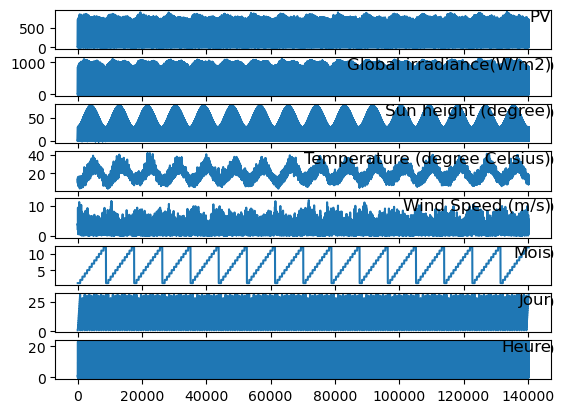

In [13]:
from matplotlib import pyplot
groups = [ 0, 1, 2, 3, 4, 5,6,7]
i = 1
values = dataset.values
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

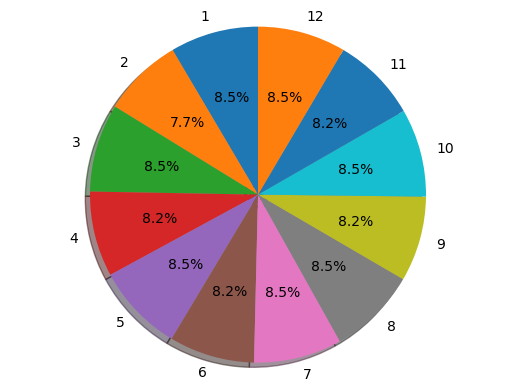

In [9]:
#Distribution des observations par mois
import matplotlib.pyplot as plt
column = 'Mois'
labels = dataset[column].unique()
sizes = []

for label in labels:
  sizes.append(len(dataset[dataset[column] == label]))

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

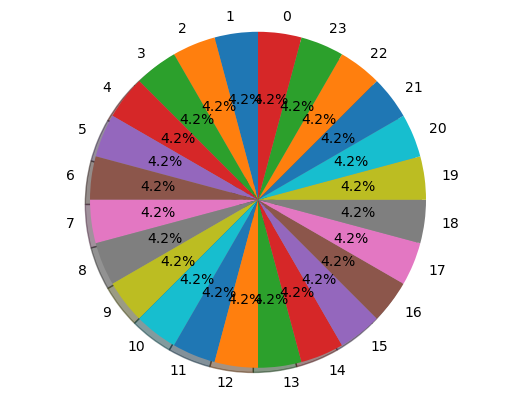

In [10]:
#Distribution des observations par heure
import matplotlib.pyplot as plt
column = 'Heure'
labels = dataset[column].unique()
sizes = []

for label in labels:
  sizes.append(len(dataset[dataset[column] == label]))

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

<Axes: >

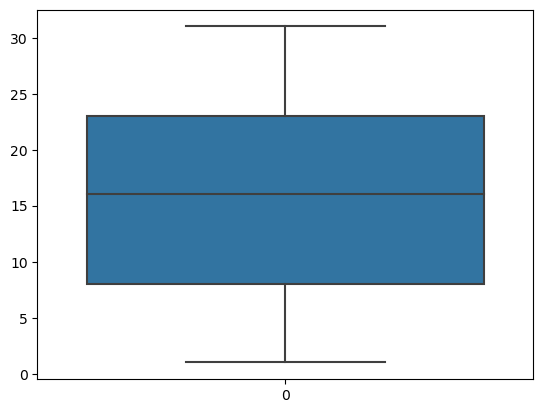

In [11]:
#ce code créera un boxplot de la colonne 'Day' en utilisant la bibliothèque seaborn.
#Un boxplot permet de visualiser rapidement la dispersion et la symétrie des données, ainsi que la présence 
#de valeurs aberrantes. Il ffest souvent utilisé en statistiques et en sciences pour comparer des distributions 
#de données entre différents groupes ou pour détecter des valeurs aberrantes dans des données.
import seaborn as sns 
sns.boxplot(dataset['Jour'])

<Axes: >

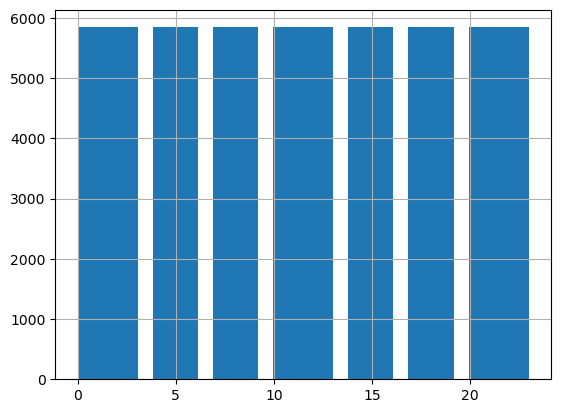

In [12]:
dataset['Heure'].hist(bins=30)

<Axes: >

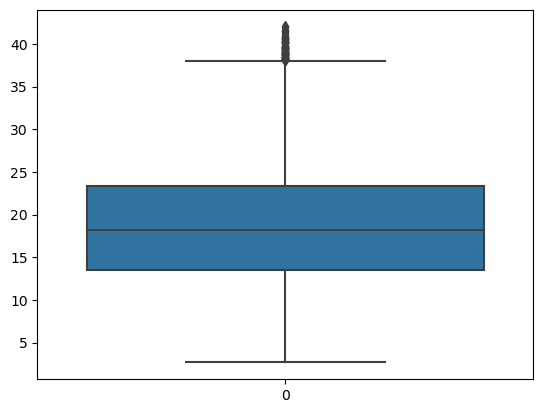

In [13]:
sns.boxplot(dataset['Temperature (degree Celsius)'])

<Axes: >

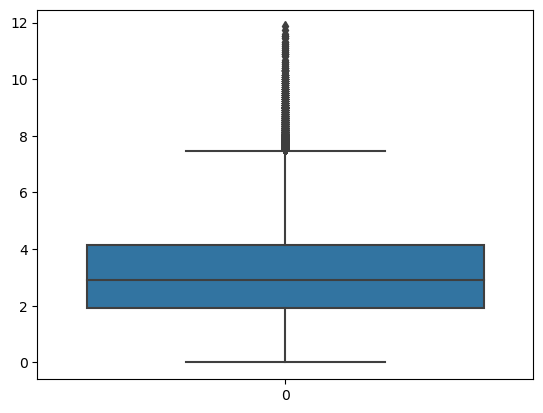

In [14]:
sns.boxplot(dataset['Wind Speed (m/s)'])

<Axes: >

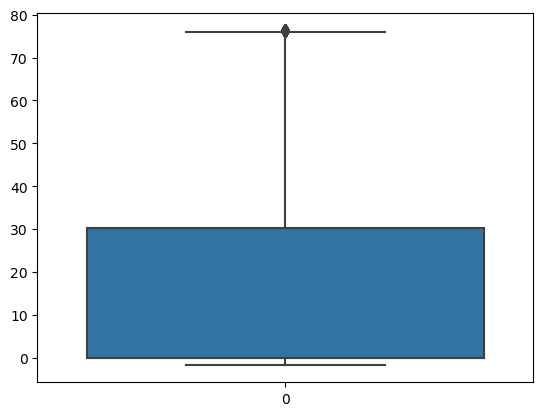

In [15]:
sns.boxplot(dataset['Sun height (degree)'])


<Axes: >

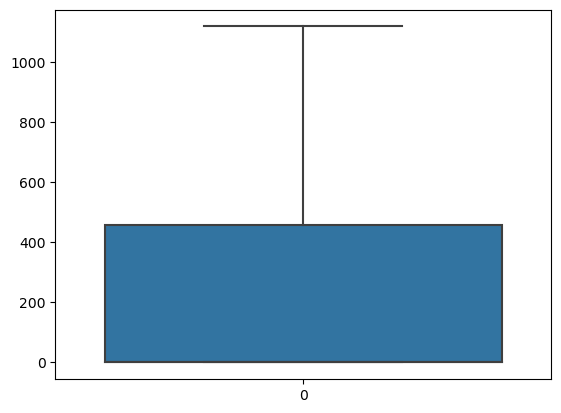

In [16]:
sns.boxplot(dataset['Global irradiance(W/m2)'])


<Axes: >

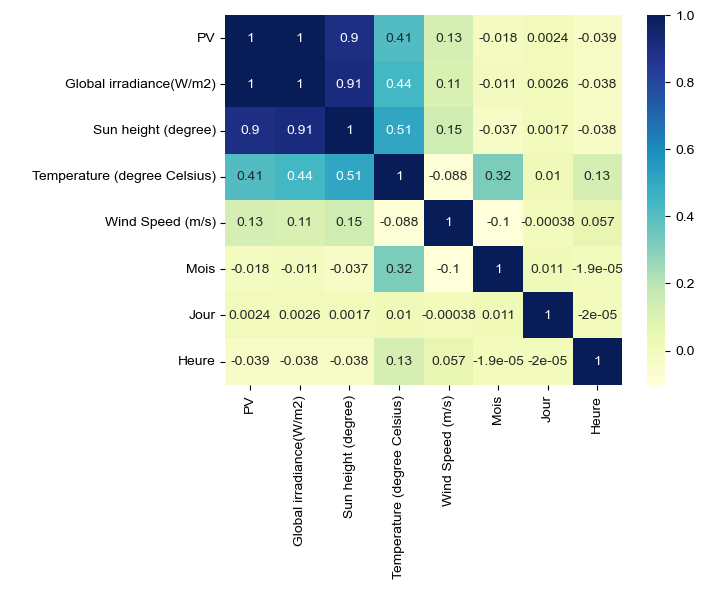

In [17]:
#Matrice de correlation
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
sns.set(rc={'figure.figsize':(20,20)})  
# displaying heatmap
dataplot

In [18]:
dataset

,PV,Global irradiance(W/m2),Sun height (degree),Temperature (degree Celsius),Wind Speed (m/s),Mois,Jour,Heure
0,0.0,0.0,0.0,9.64,3.72,1,1,1
1,0.0,0.0,0.0,9.40,3.66,1,1,2
2,0.0,0.0,0.0,9.29,3.59,1,1,3
3,0.0,0.0,0.0,9.04,3.45,1,1,4
4,0.0,0.0,0.0,8.89,3.38,1,1,5
...,...,...,...,...,...,...,...,...
140250,0.0,0.0,0.0,10.48,0.97,12,31,19
140251,0.0,0.0,0.0,9.80,1.03,12,31,20
140252,0.0,0.0,0.0,7.96,1.38,12,31,21
140253,0.0,0.0,0.0,7.61,2.07,12,31,22


In [19]:
X = dataset.iloc[:, 1:10].values # sélectionne les colonnes 1 à 6 incluses pour les variables d'entrée
y = dataset.iloc[:, 0].values # sélectionne la 7ème colonne pour la variable de sortie
print(X)
print(y)

[[ 0.    0.    9.64 ...  1.    1.    1.  ]
 [ 0.    0.    9.4  ...  1.    1.    2.  ]
 [ 0.    0.    9.29 ...  1.    1.    3.  ]
 ...
 [ 0.    0.    7.96 ... 12.   31.   21.  ]
 [ 0.    0.    7.61 ... 12.   31.   22.  ]
 [ 0.    0.    7.87 ... 12.   31.   23.  ]]
[0. 0. 0. ... 0. 0. 0.]


In [20]:
# Diviser les données en ensembles d'entraînement, de validation et de test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)


In [21]:
#hidden_layer_sizes: C'est un tuple qui définit la taille de chaque couche cachée du réseau de neurones.
#    Dans cet exemple, nous avons une seule couche cachée contenant 100 neurones.

#activation: Il s'agit de la fonction d'activation utilisée dans le réseau de neurones.
#   Ici, nous avons choisi la fonction d'activation ReLU (Rectified Linear Unit), qui est une fonction linéaire
#   pour les valeurs positives et 0 pour les valeurs négatives.

#solver: C'est l'algorithme utilisé pour optimiser les poids du réseau neuronal. Ici,
#  nous avons choisi l'algorithme "adam", qui est un algorithme de descente de gradient stochastique
# basé sur une estimation adaptative des moments.

#max_iter: C'est le nombre maximum d'itérations que l'algorithme de formation effectue avant de s'arrêter.
#    Dans cet exemple, nous avons défini le nombre maximum d'itérations à 1000.

#random_state: C'est une valeur utilisée pour initialiser le générateur de nombres aléatoires. 
#   Cette valeur est utilisée pour initialiser les poids du réseau neuronal de manière aléatoire,
#   ce qui permet d'obtenir des résultats reproductibles.
# Entraîner un modèle MLP sur l'ensemble d'entraînement

#En résumé,
#cette instruction crée un modèle MLPRegressor avec une seule couche cachée contenant 100 neurones,
#une fonction d'activation ReLU, l'algorithme "adam" pour optimiser les poids,
#un maximum de 1000 itérations et une graine aléatoire de 42.
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

MLPRegressor(max_iter=1000, random_state=42)

In [22]:
# Prédiction des sorties pour l'ensemble de test
y_pred = mlp.predict(X_test)


In [23]:
# Calcul du coefficient de détermination R² et de l'erreur quadratique moyenne (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coefficient de détermination R²: {:.2f}".format(r2))
print("Erreur quadratique moyenne (MSE): {:.2f}".format(mse))


Coefficient de détermination R²: 1.00
Erreur quadratique moyenne (MSE): 4.02


In [24]:
# Évaluer la précision du modèle sur l'ensemble de validation
score = mlp.score(X_val, y_val)
print('Précision du modèle sur l\'ensemble de validation:', score)

Précision du modèle sur l'ensemble de validation: 0.9999397709877318


In [25]:
#La précision du modèle sur l'ensemble de validation est très élevée, avec une valeur de 0,9999397709877318.
#Cela signifie que le modèle est capable de prédire avec une très grande précision les valeurs de l'ensemble de validation, 
#ce qui est un indicateur de sa performance et de sa fiabilité. 

In [26]:

Global_irradiance=0.0
Sun_height=0.0
Temperature=9.7
Wind_Speed=3.8
Mois=1
Jour=1
Heure=1
# Supposons que vous ayez un tableau numpy 'new_data' contenant une seule observation
new_data = np.array([[Global_irradiance,Sun_height,Temperature, Wind_Speed,Mois,Jour,Heure]])
# Utilisez la méthode 'predict' du modèle pour prédire la valeur pour cette observation
prediction = mlp.predict(new_data)
# Affichez la prédiction
print('Prédiction pour la nouvelle observation :', prediction)


"\nGlobal_irradiance=0.0\nSun_height=0.0\nTemperature=9.7\nWind_Speed=3.8\nMois=1\nJour=1\nHeure=1\n# Supposons que vous ayez un tableau numpy 'new_data' contenant une seule observation\nnew_data = np.array([[Global_irradiance,Sun_height,Temperature, Wind_Speed,Mois,Jour,Heure]])\n# Utilisez la méthode 'predict' du modèle pour prédire la valeur pour cette observation\nprediction = mlp.predict(new_data)\n# Affichez la prédiction\nprint('Prédiction pour la nouvelle observation :', prediction)\n"

In [ ]:

from sklearn.model_selection import cross_validate
  from sklearn.neural_network import MLPRegressor
  import numpy as np

 #hidden_layer_sizes = [(10,), (20,), (50,), (200,),(10,20), (20,20), (50,50), (200,200)]
    hidden_layer_sizes = [(10,), (20,), (50,)]
 for hidden_size in hidden_layer_sizes:
    mlp = MLPRegressor(hidden_layer_sizes=hidden_size, activation='relu', solver='adam', max_iter=1000, random_state=42)
    scoring = ['r2', 'neg_mean_squared_error']
    scores = cross_validate(mlp, X, y, cv=5, scoring=scoring)
    r2_score = np.mean(scores['test_r2'])
    r2_std = np.std(scores['test_r2'])
    mse_score = -1 * np.mean(scores['test_neg_mean_squared_error'])
    mse_std = np.std(scores['test_neg_mean_squared_error'])
    print(f"Configuration de couches cachées : {hidden_size} | R² moyen : {r2_score} ± {r2_std} | MSE moyen : {mse_score} ± {mse_std}")


In [25]:
#Ces résultats indiquent que le modèle de régression MLP avec différentes configurations de couches cachées a une très bonne
#performance pour la prédiction de la variable de sortie. En effet, les valeurs élevées pour le coefficient de détermination (R²)
#et les valeurs faibles pour l'erreur quadratique moyenne (MSE) indiquent que les prédictions sont très proches des valeurs 
#réelles de la variable de sortie.

#En outre, les résultats montrent que la configuration de couches cachées (200,) donne les meilleures performances, avec un R² 
#moyen de 0,9999 et un MSE moyen de 7,66. Cependant, les autres configurations de couches cachées donnent également 
#des performances très proches, ce qui peut indiquer que la configuration optimale dépend de la nature spécifique du problème 
#de prédiction de la variable de sortie.

,PV,Global irradiance(W/m2),Sun height (degree),Temperature (degree Celsius),Wind Speed (m/s),Mois,Jour,Heure,R1,R2,...,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23
0,0.0,0.0,0.0,9.64,3.72,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,9.40,3.66,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,9.29,3.59,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,9.04,3.45,1,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,8.89,3.38,1,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140250,0.0,0.0,0.0,10.48,0.97,12,31,19,0,0,...,0,0,0,0,0,0,0,0,0,0
140251,0.0,0.0,0.0,9.80,1.03,12,31,20,0,0,...,0,0,0,0,0,0,0,0,0,0
140252,0.0,0.0,0.0,7.96,1.38,12,31,21,0,0,...,0,0,0,0,0,0,0,0,0,0
140253,0.0,0.0,0.0,7.61,2.07,12,31,22,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
dataset

,PV,Global irradiance(W/m2),Sun height (degree),Temperature (degree Celsius),Wind Speed (m/s),Mois,Jour,Heure,R1,R2,...,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23
0,0.0,0.0,0.0,9.64,3.72,1,1,1,0.0,0.0,...,723.94,485.24,279.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,9.40,3.66,1,1,2,0.0,0.0,...,723.94,485.24,279.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,9.29,3.59,1,1,3,0.0,0.0,...,723.94,485.24,279.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,9.04,3.45,1,1,4,0.0,0.0,...,723.94,485.24,279.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,8.89,3.38,1,1,5,0.0,0.0,...,723.94,485.24,279.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140250,0.0,0.0,0.0,10.48,0.97,12,31,19,0.0,0.0,...,723.94,485.24,279.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140251,0.0,0.0,0.0,9.80,1.03,12,31,20,0.0,0.0,...,723.94,485.24,279.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140252,0.0,0.0,0.0,7.96,1.38,12,31,21,0.0,0.0,...,723.94,485.24,279.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140253,0.0,0.0,0.0,7.61,2.07,12,31,22,0.0,0.0,...,723.94,485.24,279.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0
